# Danish Library Exploratory Analysis
By Kasper Primdal Lauritzen

Data from [DBC](http://www.dbc.dk/news/hack-dbcs-data)

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

I want to read a rather large data set, but the exploratory analysis is better done on a small subset of the full data set. We'll use 1 % of the full set initially

In [5]:
cols = ["user_id", "library_id", "material_id", "gender", "birth_year", "date"]
if os.path.isfile("small_udlånsdata.csv"):
    print "reading small data set from disk"
    small_lending = pd.read_csv("small_udlånsdata.csv", parse_dates=[5, 6],
                               na_values="", index_col=0)
else:
    print "reading large data set from disk"
    lending_data = pd.read_csv("udlånsdata.csv", parse_dates=[4,5],
                               na_values="", names = cols)
    small_lending = lending_data.sample(frac=0.01)
    print "writing small data set to disk"
    small_lending.to_csv("small_udlånsdata.csv")

reading small data set from disk


So how does this look?

In [6]:
small_lending.head()

,user_id,library_id,material_id,gender,birth_year,date
35489990,618173,765700,870970-basis:25696484,k,1951-01-01,2014-04-02
19227129,352880,786000,870970-basis:28476604,k,1974-01-01,2011-09-26
8217857,169141,778700,870970-basis:28204760,k,1958-01-01,2010-09-22
14469267,410457,761500,870970-basis:26717981,k,1982-01-01,2010-01-08
30046112,147504,773000,870970-basis:27195571,k,1976-01-01,2014-04-22


Lets get the age of each user at the time of the recording. Pandas uses timedelta

In [7]:
def days_to_years(delta):
    return delta.days/365

age_in_days = small_lending.date - small_lending.birth_year
age_in_years = age_in_days.apply(lambda x: round(x / np.timedelta64(365, 'D')))
small_lending['age'] = age_in_years

OK, lets do some summary statistics on this. We'll group it by gender and age, and see how many transactions was made for each of these combinations.

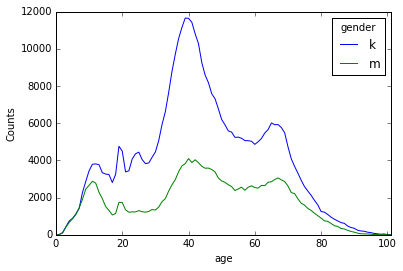

In [8]:
age_gender = pd.crosstab( small_lending.age, small_lending.gender)
ax = age_gender.plot()
ax.set_ylabel("Counts")

Let's look at the relative frequencies by age.

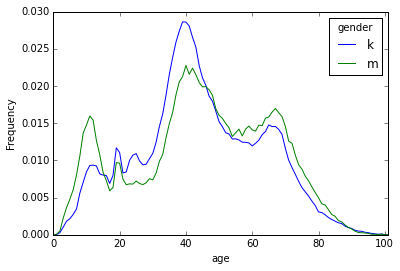

In [9]:
age_gender_pct = age_gender.div(age_gender.sum(0))
ax = age_gender_pct.plot()
ax.set_ylabel("Frequency")

It seems teenage boys are more likely than teenage girls to go to the library. What do they get out? First, let's get the frequency that each book is borrowed.

In [10]:
total_records = float(small_lending.count().user_id)
counts = small_lending['material_id'].value_counts()
freqs = counts/float(total_records)
small_lending['freq']= freqs[small_lending.material_id].values

How many books take up the top 10, 25 and 50 % of the lending?

[  578  3048 12579]


0.031461403644510527

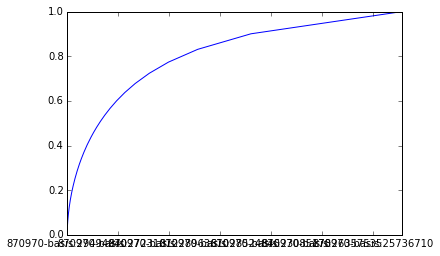

In [15]:
freqs.sort(ascending=False)
summed = freqs.cumsum()
ax = summed.plot()
print summed.searchsorted([0.1, 0.25, 0.5])
summed[100]

So the top 578 books account for 10% of all borrowing! And the top 100 books account for 3%. Huh. 

In [12]:
teen_boys = small_lending[(10 < small_lending.age) & (small_lending.age < 20) & (small_lending.gender == 'm')]

In [13]:
teen_boys = teen_boys.sort('freq', ascending=False)
teen_boys.head()

,user_id,library_id,material_id,gender,birth_year,date,age,freq
54569224,101559,718700,870970-basis:29494940,m,2003-01-01,2015-01-19,12,0.000611
54774570,1057038,733000,870970-basis:29494940,m,2003-01-01,2015-02-13,12,0.000611
50593986,761457,710100,870970-basis:28511663,m,1998-01-01,2014-11-20,17,0.000609
47364773,600545,779100,870970-basis:29754519,m,2004-01-01,2014-08-14,11,0.000558
17655399,479376,737600,870970-basis:25683463,m,2001-01-01,2011-08-11,11,0.000500
